In [1]:
## Trim down imports to only neccesary 

import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_columns', None)
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import Subset
import os
import datetime
import re
import simple_datasets as sd

import importlib
importlib.reload(sd)

/Users/willhoff/Desktop/research_23_24/research_09_11/env/lib/python3.11/site-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
/Users/willhoff/Desktop/research_23_24/research_09_11/env/lib/python3.11/site-packages/torchvision/transforms/v2/__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still cha

<module 'simple_datasets' from '/Users/willhoff/Desktop/thesis_2024/preprocessing/simple_datasets.py'>

In [2]:
local_SVID_image_dir = "/Users/willhoff/Desktop/thesis_2024/data/img_data/SVID"
local_SVID_toc_path = "/Users/willhoff/Desktop/thesis_2024/data/tabular/SVID_TOC.csv"

svid_o = pd.read_csv(local_SVID_toc_path)

cropped_SVID, full_SVID = sd.crop_svid(return_full=True)

svid_pixel_values_tensor, svid_labels_tensor, svid_scaler,depths,sources, indices = sd.attach_labels("%toc", svid_o, full_SVID, "sediment_depth", "SVID", scaled=False, sediment_width = 1)

31621.14343029087


In [5]:
for depth in depths:
    print(depth)

0.5
3.5
7.5
11.5
15.5
19.5
23.5
27.5
31.5
35.5
39.5
43.5
47.5
51.5
59.5
63.5
67.5
71.5
75.5
79.5
83.5
87.5
91.5
95.5
99.5
107.5
111.5
115.5
119.5
123.5
127.5
131.5
135.5
138.5
145.5
149.5
152.63540621865596
156.63540621865596
160.63540621865596
164.63540621865596
172.63540621865596
180.63540621865596
188.63540621865596
196.63540621865596
204.63540621865596
212.63540621865596
220.63540621865596
228.63540621865596
230.63540621865596
232.63540621865596
234.63540621865596
236.63540621865596
238.63540621865596
239.63540621865596
252.63540621865596
260.63540621865593
268.63540621865593
276.63540621865593
284.63540621865593
292.63540621865593
300.63540621865593
308.8510531594784
324.8510531594784
332.8510531594784
338.8510531594784
340.8510531594784
342.8510531594784
348.8510531594784
356.8510531594784
364.8510531594784
372.8510531594784
380.8510531594784
388.8510531594784
396.8510531594784
404.8510531594784
412.8510531594784
420.8510531594784
428.8510531594784
436.8510531594784
442.851053159

In [ ]:
test_loader = sd.create_loader(csv_path = "/Users/willhoff/Desktop/research_23_24/paleoclimate/will_sandbox/chunk_data/LVID/1cm/data/%toc_datset.csv", set = "Test", second_csv = "/Users/willhoff/Desktop/research_23_24/paleoclimate/will_sandbox/chunk_data/SVID/1cm/data/%toc_datset.csv")

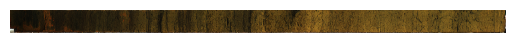

img 1 ratio 183.38815789473685


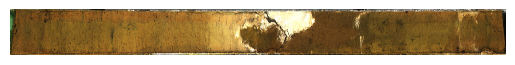

img 2 ratio 201.78571428571428


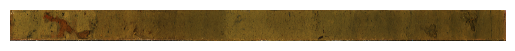

img 3 ratio 200.48543689320388


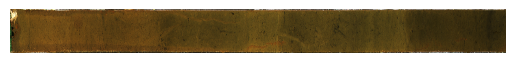

img 4 ratio 202.05479452054794


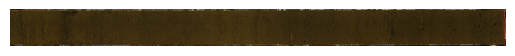

img 5 ratio 199.54285714285714


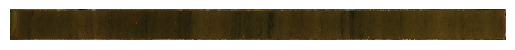

img 6 ratio 200.95693779904306


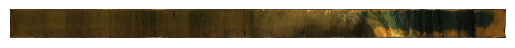

img 7 ratio 200.89285714285714


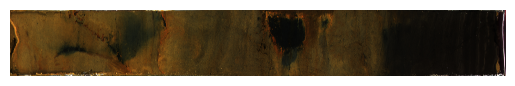

img 8 ratio 204.21052631578948
whole measure 749.5


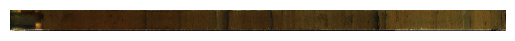

img 1 ratio 200.49668874172184


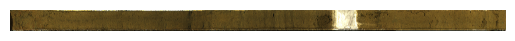

img 2 ratio 200.5921052631579


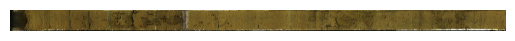

img 3 ratio 200.66225165562915


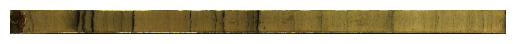

img 4 ratio 200.74906367041197


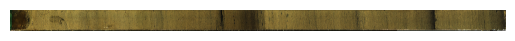

img 5 ratio 175.16339869281046


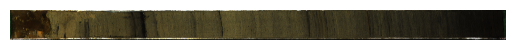

img 6 ratio 197.69585253456222


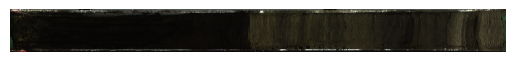

img 7 ratio 202.0
whole measure 924.0


In [ ]:
sd.crop_lvid(display = True, do_print = True)
sd.crop_svid(display = True, do_print = True)



In [ ]:
print(train_loader)

In [ ]:
test_loader = sd.create_loader("/Users/willhoff/Desktop/research_23_24/paleoclimate/will_sandbox/chunk_data/LVID/1cm/data/%toc_datset.csv", set = "Test", second_csv="/Users/willhoff/Desktop/research_23_24/paleoclimate/will_sandbox/chunk_data/SVID/1cm/data/%toc_datset.csv")

/Users/willhoff/Desktop/research_23_24/paleoclimate/will_sandbox/simple_datasets.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.pixel_values = torch.stack([torch.tensor(pv, dtype=torch.float32) for pv in pixel_values])
/Users/willhoff/Desktop/research_23_24/paleoclimate/will_sandbox/simple_datasets.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.pixel_values = torch.stack([torch.tensor(pv, dtype=torch.float32) for pv in pixel_values])


In [ ]:
svid_t = datasets.load_SVID_temperature()
svid_o = datasets.load_SVID_other(keep_all=True)
svid_b = datasets.load_SVID_brGDGTs()


DATA_DIR = "../data/"
with open(os.path.join(DATA_DIR, "SVID_brGDGTs.csv"), "r") as inf:
        svid_b = pd.read_csv(inf)
        
lvid_o = pd.read_excel('../data/LVID_bulk_geochem.xlsx')

lvid_o.columns = [sd.clean_column_name(col) for col in lvid_o.columns]

lvid_b = pd.read_excel('../data/HEID_LVID_brGDGTs.xlsx','LVID brGDGTs')
lvid_b.columns = [sd.clean_column_name(col) for col in lvid_b.columns]
lvid_b.rename(columns={'mbt\'-5me': "MBT"}, errors="raise", inplace=True) 

lvid_o.head()

svid_o.columns = [sd.clean_column_name(col) for col in svid_o.columns]

lvid_bsi = pd.read_excel('../data/LVID_BSi.xlsx')


,sample_id,section_depth,cum_depth,age,δ13cvpdb,total_c,%toc,δ15nair,total_n,%n,c/n,sample_weight_from_sample_list,sample_mass
0,20LVID-02A-19,19.0,3.0,-4,-26.801533,1374.888037,7.014735,0.232224,131.049083,0.668618,10.491398,19.6,19600
1,20LVID-02A-22 5,22.5,6.5,58,-24.681210,1464.275417,7.213179,0.196497,135.527495,0.667623,10.804268,20.3,20300
2,20LVID-02A-26,26.0,10.0,127,-24.237128,1101.039173,4.186461,0.947665,100.056127,0.380442,11.004215,26.3,26300
3,20LVID-02A-29 5,29.5,13.0,201,-24.981566,1240.047631,2.966621,1.093422,108.097362,0.258606,11.471581,41.8,41800
4,20LVID-02A-33,33.0,17.0,287,-24.953268,1372.130105,4.848516,0.807939,120.690241,0.426467,11.369023,28.3,28300


In [ ]:
svid_o.columns
lvid_o.columns
lvid_o.rename(columns={'c/n': "c-n"}, errors="raise", inplace=True) 
svid_o.rename(columns={'c/n': "c-n"}, errors="raise", inplace=True) 

svid_o.head()
lvid_o.head()

Index(['sediment_depth', 'age', '%toc', 'd13c', 'd15n', '%tn', 'c/n', 'bsi',
       'year'],
      dtype='object')

Index(['sample_id', 'section_depth', 'cum_depth', 'age', 'δ13cvpdb', 'total_c',
       '%toc', 'δ15nair', 'total_n', '%n', 'c/n',
       'sample_weight_from_sample_list', 'sample_mass'],
      dtype='object')

,sediment_depth,age,%toc,d13c,d15n,%tn,c-n,bsi,year
0,0.0,11.6732,3.6,-25.9,0.7,0.4,8.0,76.672,2020.0000
1,3.0,52.5294,3.1,-25.8,0.7,0.4,8.5,59.449,1979.1438
2,7.0,99.2222,2.9,-25.7,0.6,0.3,9.4,64.895,1932.4510
3,11.0,145.9150,3.1,-25.9,0.3,0.3,9.4,54.073,1885.7582
4,15.0,192.6078,3.1,-25.9,0.7,0.3,9.3,57.037,1839.0654


,sample_id,section_depth,cum_depth,age,δ13cvpdb,total_c,%toc,δ15nair,total_n,%n,c-n,sample_weight_from_sample_list,sample_mass
0,20LVID-02A-19,19.0,3.0,-4,-26.801533,1374.888037,7.014735,0.232224,131.049083,0.668618,10.491398,19.6,19600
1,20LVID-02A-22 5,22.5,6.5,58,-24.681210,1464.275417,7.213179,0.196497,135.527495,0.667623,10.804268,20.3,20300
2,20LVID-02A-26,26.0,10.0,127,-24.237128,1101.039173,4.186461,0.947665,100.056127,0.380442,11.004215,26.3,26300
3,20LVID-02A-29 5,29.5,13.0,201,-24.981566,1240.047631,2.966621,1.093422,108.097362,0.258606,11.471581,41.8,41800
4,20LVID-02A-33,33.0,17.0,287,-24.953268,1372.130105,4.848516,0.807939,120.690241,0.426467,11.369023,28.3,28300


In [ ]:
svid_o.describe()
lvid_o.describe()



,sediment_depth,age,%toc,d13c,d15n,%tn,c/n,bsi,year
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,506.560773,5930.662775,1.727624,-24.322099,1.540884,0.292818,5.472928,96.600348,-3898.989575
std,308.766222,3604.343081,0.942815,1.601478,0.955619,0.157774,1.431311,31.717854,3604.343081
min,0.000000,11.673200,0.000000,-31.200000,-0.200000,0.000000,1.300000,22.026000,-8515.063000
25%,213.000000,2503.901400,0.900000,-25.400000,1.000000,0.200000,5.100000,72.590000,-7289.377000
50%,557.000000,6519.482200,1.900000,-24.700000,1.400000,0.300000,5.500000,106.276000,-4487.809000
75%,797.000000,9321.050200,2.600000,-23.600000,1.800000,0.400000,5.900000,122.181000,-472.228200
max,902.000000,10546.736200,3.600000,-19.800000,5.100000,0.500000,9.400000,158.874000,2020.000000


,section_depth,cum_depth,age,δ13cvpdb,total_c,%toc,δ15nair,total_n,%n,c/n,sample_weight_from_sample_list,sample_mass
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,63.826667,362.603333,5066.813333,-21.634565,741.113416,5.157700,-0.739569,87.637395,0.618401,8.152921,15.844000,15844.000000
std,36.199206,235.335134,2700.912998,1.637360,298.100461,2.264667,0.931660,30.534376,0.260289,1.438938,7.426792,7426.792419
min,8.500000,3.000000,-4.000000,-34.868342,47.825859,0.185372,-2.490998,9.584512,0.040582,3.858221,6.800000,6800.000000
25%,33.000000,133.375000,2793.250000,-21.852532,653.330397,3.951033,-1.262207,77.671604,0.451463,7.732681,11.700000,11700.000000
50%,60.500000,361.000000,5645.500000,-21.278198,757.339882,5.735836,-0.998697,94.190983,0.688001,8.211551,13.400000,13400.000000
75%,90.000000,590.125000,7425.250000,-20.809372,915.712166,6.686495,-0.494918,107.725388,0.812283,8.878720,16.850000,16850.000000
max,155.000000,724.500000,9055.000000,-19.391919,1464.275417,10.719894,2.959212,137.447915,1.069600,11.471581,56.700000,56700.000000


In [ ]:
lvid_bsi.columns = [sd.clean_column_name(col) for col in lvid_bsi.columns]
lvid_bsi.head()

lvid_bsi.insert(2, "cum_depth", lvid_o['cum_depth'])

,core,section,depth,est_age_bp,kbr,mass,bsi,c-h,860_unk,739_unk,bsi_broad,dummy
0,20LVID,02A,19.0,0,0.500,0.010,45.065,1.164,0.594,0.014,45.669,1.020
1,20LVID,02A,22.5,50,0.499,0.010,56.912,0.996,0.468,-0.010,56.333,0.423
2,20LVID,02A,26.0,100,0.499,0.010,30.292,0.335,0.672,-0.016,35.632,0.018
3,20LVID,02A,29.5,150,0.500,0.010,20.682,0.010,0.683,-0.008,26.416,0.021
4,20LVID,02A,33.0,200,0.500,0.009,35.822,0.758,0.741,-0.012,41.759,0.012


In [ ]:
lvid_bsi.head()

,core,section,cum_depth,depth,est_age_bp,kbr,mass,bsi,c-h,860_unk,739_unk,bsi_broad,dummy
0,20LVID,02A,3.0,19.0,0,0.500,0.010,45.065,1.164,0.594,0.014,45.669,1.020
1,20LVID,02A,6.5,22.5,50,0.499,0.010,56.912,0.996,0.468,-0.010,56.333,0.423
2,20LVID,02A,10.0,26.0,100,0.499,0.010,30.292,0.335,0.672,-0.016,35.632,0.018
3,20LVID,02A,13.0,29.5,150,0.500,0.010,20.682,0.010,0.683,-0.008,26.416,0.021
4,20LVID,02A,17.0,33.0,200,0.500,0.009,35.822,0.758,0.741,-0.012,41.759,0.012


In [ ]:
lvid_b.columns = [sd.clean_column_name(col) for col in lvid_b.columns]

In [ ]:
svid_b.head()

,Lake,Sediment_Depth,MBT,fIa
0,SVID,0,0.126995,0.113324
1,SVID,7,0.133994,0.120358
2,SVID,15,0.137242,0.122855
3,SVID,23,0.132345,0.117512
4,SVID,31,0.144388,0.129024


In [ ]:
full_SVID = []
full_LVID = []

In [ ]:
sd.load_and_display_images('img_data/SVID',full_SVID, "SVID")
## reverse = False because 1B-7B seems darkest so would make sense for it to be on the bottom
full_SVID.sort(key=sd.sortimg,reverse=False)

sd.load_and_display_images('img_data/LVID',full_LVID, "LVID")
## reverse = False because 1B-7B seems darkest so would make sense for it to be on the bottom
full_LVID.sort(key=sd.sortimg,reverse=False)

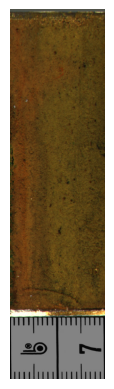

array([[[88, 85, 78],
        [81, 81, 73],
        [82, 82, 74],
        ...,
        [82, 85, 76],
        [84, 85, 77],
        [84, 85, 77]],

       [[84, 84, 76],
        [79, 80, 72],
        [81, 82, 74],
        ...,
        [81, 84, 75],
        [80, 83, 74],
        [80, 81, 73]],

       [[82, 85, 76],
        [80, 83, 74],
        [82, 85, 76],
        ...,
        [79, 85, 75],
        [82, 85, 76],
        [81, 84, 75]],

       ...,

       [[ 7,  7,  7],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [10, 10, 10],
        [ 7,  7,  7],
        [ 6,  6,  6]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [ 6,  6,  6],
        ...,
        [ 7,  7,  7],
        [ 7,  7,  7],
        [ 6,  6,  6]],

       [[ 6,  6,  6],
        [ 6,  6,  6],
        [ 5,  5,  5],
        ...,
        [ 6,  6,  6],
        [ 8,  8,  8],
        [ 6,  6,  6]]], dtype=uint8)

In [ ]:
start = 1000
end = 1400
box = (start, 0, end, 1566)
sd.crop_image(full_LVID[4], box, display= True)

(-0.5, 289.5, 1499.5, -0.5)

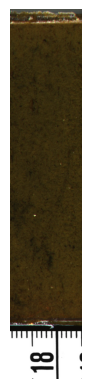

In [ ]:
start = 3400
end = 3690
box = (start, 0, end, 1500)

left, lower, right, upper = box

# Crop the image using array slicing
cropped_image = full_LVID[4].image[lower:upper, left:right]

# Update image data
cropped = cropped_image

# Optionally, display the cropped image

plt.imshow(cropped)
plt.axis('off')  # This hides the axis
plt.show()

In [ ]:
cropped_LVID, full_LVID = sd.crop_lvid(return_full=True)


In [ ]:
cropped_SVID, full_SVID = sd.crop_svid(return_full=True)


In [ ]:
## LVID depth column: "cum_depth"
## SVID depth column: "Sediment_Depth"
## Built BSI, LVID
importlib.reload(sd)
sd.build_and_save_dataset("c-n", lvid_o, full_LVID, "cum_depth", "LVID", sediment_width = 5) 





<module 'simple_datasets' from '/Users/willhoff/Desktop/research_23_24/paleoclimate/will_sandbox/simple_datasets.py'>

Image 'chunk_0.jpg' already exists. Skipping overwrite.
Image 'chunk_1.jpg' already exists. Skipping overwrite.
Image 'chunk_2.jpg' already exists. Skipping overwrite.
Image 'chunk_3.jpg' already exists. Skipping overwrite.
Image 'chunk_4.jpg' already exists. Skipping overwrite.
Image 'chunk_5.jpg' already exists. Skipping overwrite.
Image 'chunk_6.jpg' already exists. Skipping overwrite.
Image 'chunk_7.jpg' already exists. Skipping overwrite.
Image 'chunk_8.jpg' already exists. Skipping overwrite.
Image 'chunk_9.jpg' already exists. Skipping overwrite.
Image 'chunk_10.jpg' already exists. Skipping overwrite.
Image 'chunk_11.jpg' already exists. Skipping overwrite.
Image 'chunk_12.jpg' already exists. Skipping overwrite.
Image 'chunk_13.jpg' already exists. Skipping overwrite.
Image 'chunk_14.jpg' already exists. Skipping overwrite.
Image 'chunk_15.jpg' already exists. Skipping overwrite.
Image 'chunk_16.jpg' already exists. Skipping overwrite.
Image 'chunk_17.jpg' already exists. Skip

,index,depth,label,chunk,source,set
0,0,2.500000,10.491398,chunk_data/LVID/5cm/chunks/chunk_0.jpg,LVID,Train
1,1,7.500000,10.804268,chunk_data/LVID/5cm/chunks/chunk_1.jpg,LVID,Train
2,2,12.500000,11.237898,chunk_data/LVID/5cm/chunks/chunk_2.jpg,LVID,Test
3,3,17.500000,11.369023,chunk_data/LVID/5cm/chunks/chunk_3.jpg,LVID,Test
4,4,22.500000,10.828125,chunk_data/LVID/5cm/chunks/chunk_4.jpg,LVID,Train
...,...,...,...,...,...,...
169,169,864.994241,NaN,chunk_data/LVID/5cm/chunks/chunk_169.jpg,LVID,N/A
170,170,869.994241,NaN,chunk_data/LVID/5cm/chunks/chunk_170.jpg,LVID,N/A
171,171,874.994241,NaN,chunk_data/LVID/5cm/chunks/chunk_171.jpg,LVID,N/A
172,172,879.994241,NaN,chunk_data/LVID/5cm/chunks/chunk_172.jpg,LVID,N/A


<function matplotlib.pyplot.show(close=None, block=None)>

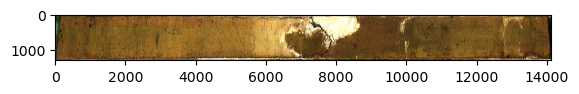

In [ ]:
plt.imshow(cropped_LVID[1].image)
plt.show







In [ ]:
## Functions below this point no longer work ##

In [ ]:
target= "%TOC"
pixel_values_tensor, temp_labels,  _, Sdepths, Ssource = sd.attach_labels(target, svid_o, full_SVID, 'Sediment_Depth', "SVID")
target= "%toc"
pixel_values_tensor2, temp_labels2, _, Ldepths, Lsource  = sd.attach_labels(target, lvid_o, full_LVID, 'cum_depth', "LVID")

img_tensor = torch.cat((pixel_values_tensor,pixel_values_tensor2))
labels_tensor = torch.cat((temp_labels,temp_labels2))
depths = np.append(Sdepths,Ldepths)
sources = np.append(Ssource,Lsource)
train_loader, val_loader, scaler = sd.create_dataset(img_tensor, labels_tensor,depths, sources) 

0 
 3.35 

1 
 2.9 

2 
 3.1 

3 
 3.05 

4 
 2.6 

5 
 2.7 

6 
 2.7 

7 
 2.8 

8 
 2.9 

9 
 2.7 

10 
 2.6 

11 
 2.1 

12 
 2.7 

13 
 1.8 

14 
 3.0 

15 
 2.6500000000000004 

16 
 2.9 

17 
 2.7 

18 
 2.6 

19 
 2.25 

20 
 nan 

21 
 2.7 

22 
 2.6 

23 
 2.7 

24 
 2.6 

25 
 2.9 

26 
 2.8 

27 
 1.9 

28 
 nan 

29 
 2.7 

30 
 2.7 

31 
 2.6500000000000004 

32 
 2.6 

33 
 nan 

34 
 2.4 

35 
 2.3 

36 
 nan 

37 
 2.1 

38 
 nan 

39 
 1.6 

40 
 2.4 

41 
 nan 

42 
 2.1 

43 
 2.0 

44 
 nan 

45 
 2.1500000000000004 

46 
 2.2 

47 
 2.0000000000000004 

48 
 nan 

49 
 nan 

50 
 2.8 

51 
 2.8 

52 
 nan 

53 
 2.8 

54 
 nan 

55 
 2.7 

56 
 2.7 

57 
 nan 

58 
 2.8 

59 
 2.8 

60 
 2.8 

61 
 nan 

62 
 nan 

63 
 nan 

64 
 2.3 

65 
 2.6 

66 
 2.4 

67 
 2.1 

68 
 2.4 

69 
 nan 

70 
 2.7 

71 
 nan 

72 
 2.6 

73 
 2.7 

74 
 nan 

75 
 2.4 

76 
 2.4 

77 
 nan 

78 
 2.6 

79 
 nan 

80 
 2.5 

81 
 2.6 

82 
 nan 

83 
 2.4 

84 
 2.4 

85 
 nan 

8

/Users/willhoff/Desktop/research_23_24/research_09_11/env/lib/python3.11/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


ValueError: too many values to unpack (expected 5)

In [ ]:
print(sd.load_data('%TOC', lake="both", set="full", scaled=False))

0 <simple_datasets.ImageData object at 0x29145b910>
1
3200 31075
1 <simple_datasets.ImageData object at 0x29145b410>
2
1400 15525
2 <simple_datasets.ImageData object at 0x291459e10>
3
1200 21850
3 <simple_datasets.ImageData object at 0x29145a390>
4
1000 21650
4 <simple_datasets.ImageData object at 0x29145a410>
5
1000 20600
5 <simple_datasets.ImageData object at 0x29145b010>
6
1000 21150
6 <simple_datasets.ImageData object at 0x29145af90>
7
900 21900
7 <simple_datasets.ImageData object at 0x29145bcd0>
8
900 23400
8 <simple_datasets.ImageData object at 0x29145ab90>
9
1200 10900


/Users/willhoff/Desktop/research_23_24/research_09_11/env/lib/python3.11/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


0 <simple_datasets.ImageData object at 0x291458890>
1B-1B-1-A
1000 31275
1 <simple_datasets.ImageData object at 0x29141c490>
1B-2B-1-A
800 31290
2 <simple_datasets.ImageData object at 0x29141e510>
1B-3B-1-A
800 31100
3 <simple_datasets.ImageData object at 0x291458e50>
1B-4B-1-A
1200 28000
4 <simple_datasets.ImageData object at 0x29145a9d0>
1B-5B-1-A
1200 31700
5 <simple_datasets.ImageData object at 0x29141c1d0>
1B-6B-1-A
875 22325
6 <simple_datasets.ImageData object at 0x290ff67d0>
1B-7B-1-A
1600 16750
(<torch.utils.data.dataloader.DataLoader object at 0x11245f010>, <torch.utils.data.dataloader.DataLoader object at 0x291459290>, None)


In [ ]:
train_loader, test_loader, scaler = sd.load_data("%TOC", lake="both", set="full", scaled=False, random = False)

/Users/willhoff/Desktop/research_23_24/research_09_11/env/lib/python3.11/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [ ]:
train_loader1, test_loader1, _ = sd.load_data("%TOC", lake="both", set="full", scaled=False, sediment_width = 1)

/Users/willhoff/Desktop/research_23_24/research_09_11/env/lib/python3.11/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [ ]:
train_loader2, test_loader2, _ = sd.load_data("%TOC", lake="both", set="full", scaled=False, sediment_width = 10)

/Users/willhoff/Desktop/research_23_24/research_09_11/env/lib/python3.11/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [ ]:
print(len(train_loader))

41


In [ ]:
print(len(train_loader1))

53


In [ ]:
print(len(test_loader2))

7


In [ ]:

for batch in train_loader:
        images, labels, batch_depths, batch_source = batch
        print(batch_source[0])
        print(torch.max(batch_depths).item()) 
        
print("TEST/n/n")

for batch in test_loader:
        images, labels, batch_depths, batch_source = batch
        print(torch.max(batch_depths).item()) 


SVID
492.0
SVID
709.0
LVID
558.5
LVID
669.0
LVID
580.5
SVID
673.0
LVID
513.0
SVID
613.0
SVID
719.0
SVID
584.0
SVID
721.0
LVID
569.0
SVID
693.0
LVID
713.0
SVID
621.0
SVID
527.0
SVID
685.0
SVID
549.0
LVID
463.0
SVID
589.0
LVID
520.0
LVID
665.0
LVID
599.75
SVID
251.5
SVID
565.0
LVID
605.0
SVID
534.0
LVID
309.0
SVID
689.0
LVID
589.25
SVID
629.0
LVID
645.0
SVID
581.0
SVID
659.0
LVID
637.0
LVID
594.5
LVID
470.0
SVID
705.0
LVID
342.0
LVID
699.0
LVID
506.0
TEST/n/n
624.25
650.0
674.5
694.75
721.0
741.0
767.0
793.0
822.0
879.0
894.0


In [ ]:
total = 0
for batch in train_loader1:
        images, labels, batch_depths, batch_source = batch
        print(batch_depths, "\n")
        total += len(labels)
print(total)

total = 0
for batch in test_loader1:
        images, labels, batch_depths, batch_source = batch
        print(batch_depths, "\n")
        total += len(labels)
print(total)

tensor([645., 478., 520., 717., 677.], dtype=torch.float64) 

tensor([325.0000, 667.5000, 605.0000, 587.5000, 189.0000], dtype=torch.float64) 

tensor([463., 874., 785., 161., 876.], dtype=torch.float64) 

tensor([761., 701., 181., 721., 183.], dtype=torch.float64) 

tensor([405.0000, 745.0000, 881.0000, 125.5000, 613.0000], dtype=torch.float64) 

tensor([306.5000, 138.0000, 251.5000, 724.5000, 621.0000], dtype=torch.float64) 

tensor([ 83.0000, 533.0000,  55.5000, 697.0000, 339.0000], dtype=torch.float64) 

tensor([470.0000,  38.0000, 693.0000, 681.5000,  69.5000], dtype=torch.float64) 

tensor([725.0000, 713.0000, 875.0000, 238.5000,   0.0000], dtype=torch.float64) 

tensor([501.0000,  80.0000, 657.0000, 873.0000, 696.5000], dtype=torch.float64) 

tensor([329.5000, 899.0000,  94.0000, 669.0000,   6.5000], dtype=torch.float64) 

tensor([293.0000,  31.0000,  52.0000, 629.5000, 146.5000], dtype=torch.float64) 

tensor([894., 157.,  87.,  59.,  10.], dtype=torch.float64) 

tensor([  3., 

In [ ]:
total = 0
for batch in train_loader2:
        images, labels, batch_depths, batch_source = batch
        print(batch_depths, "\n")
        total += len(labels)
print(total)

total = 0
for batch in test_loader2:
        images, labels, batch_depths, batch_source = batch
        print(batch_depths, "\n")
        total += len(labels)
print(total)

tensor([172.5000, 389.0000, 601.5000, 597.0000, 769.0000], dtype=torch.float64) 

tensor([549.0000, 115.0000, 817.0000,  65.0000, 403.5000], dtype=torch.float64) 

tensor([429.0000, 502.5000, 301.0000, 452.5000, 807.0000], dtype=torch.float64) 

tensor([617.0000, 697.0000, 409.0000, 197.0000,  74.7500], dtype=torch.float64) 

tensor([442.0000, 381.0000, 677.0000, 501.0000, 216.5000], dtype=torch.float64) 

tensor([189.0000,  66.0000, 421.0000, 739.0000,   3.3333], dtype=torch.float64) 

tensor([269., 147., 107., 629., 369.], dtype=torch.float64) 

tensor([265.5000, 562.0000, 125.0000, 368.0000, 393.0000], dtype=torch.float64) 

tensor([177.0000, 789.0000, 797.0000, 565.0000, 329.5000], dtype=torch.float64) 

tensor([397.0000, 275.7500, 612.0000, 340.0000, 707.0000], dtype=torch.float64) 

tensor([378.5000, 589.0000,  24.0000, 657.0000, 414.0000], dtype=torch.float64) 

tensor([719.0000,  35.0000, 591.0000, 429.0000,  55.5000], dtype=torch.float64) 

tensor([ 45.0000, 217.0000, 306.5000

In [ ]:
train_loader, test_loader, _ = sd.load_data("%TOC", lake="lvid", set="full", scaled=False, sediment_width = 5, random =False)
train_loader1, test_loader1, _ = sd.load_data("%TOC", lake="svid", set="full", scaled=False, sediment_width = 1, random =False)
train_loader2, test_loader2, _ = sd.load_data("%TOC", lake="svid", set="full", scaled=False, sediment_width = 10, random =False)

/Users/willhoff/Desktop/research_23_24/research_09_11/env/lib/python3.11/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
/Users/willhoff/Desktop/research_23_24/research_09_11/env/lib/python3.11/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
/Users/willhoff/Desktop/research_23_24/research_09_11/env/lib/python3.11/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [ ]:
for batch in train_loader:
        images, labels, batch_depths, batch_source = batch
        print(torch.max(batch_depths).item()) 
        

print ("\nTEST\n")

for batch in test_loader:
        images, labels, batch_depths, batch_source = batch
        print(batch_depths)

520.0
574.25
449.0
485.0
371.5
329.5
456.0
569.0
336.5
589.25
492.0
594.5
553.25
599.75
435.0
563.75
580.5
506.0
421.0
322.5

TEST

tensor([605.0000, 610.2500, 615.5000, 619.0000, 624.2500], dtype=torch.float64)
tensor([629.5000, 634.7500, 639.5000, 644.7500, 650.0000], dtype=torch.float64)
tensor([655.2500, 660.5000, 664.0000, 669.2500, 674.5000], dtype=torch.float64)
tensor([679.7500, 685.0000, 687.5000, 687.5000, 694.7500], dtype=torch.float64)
tensor([700.0000, 705.2500, 710.5000, 714.0000, 721.0000], dtype=torch.float64)
tensor([724.5000], dtype=torch.float64)


In [ ]:
total = 0
for batch in train_loader1:
        images, labels, batch_depths, batch_source = batch
        total += len(labels)
print(total)

total = 0
for batch in test_loader1:
        images, labels, batch_depths, batch_source = batch
        total += len(labels)
print(total)

145
37


In [ ]:
total = 0
for batch in train_loader2:
        images, labels, batch_depths, batch_source = batch
        total += len(labels)
print(total)

total = 0
for batch in test_loader2:
        images, labels, batch_depths, batch_source = batch
        total += len(labels)
print(total)

66
17
